[*********************100%***********************]  8 of 8 completed


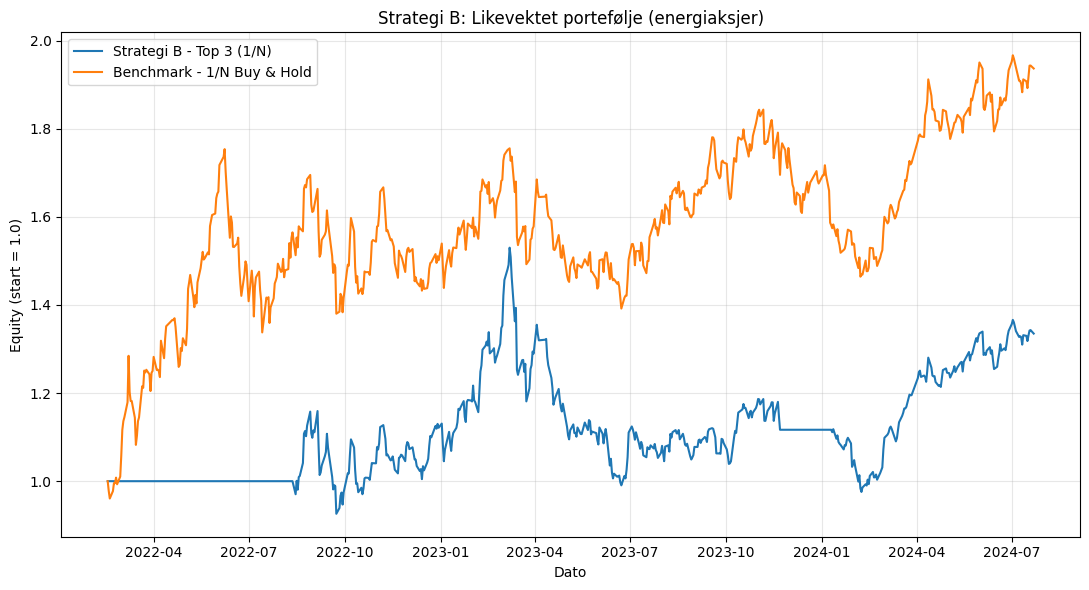

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Olje & gass ---
tickers = [  "EQNR.OL", "AKRBP.OL", "VAR.OL", "DNO.OL", "SUBC.OL", "TGS.OL","PGS.OL", "BWO.OL"]
start = "2016-01-01"
top_n = 3  # hold Top N aksjer

# --- Last ned priser ---
prices = yf.download(tickers, start=start, auto_adjust=True)["Close"].dropna()

# --- Alignment-score (0–3) ---
dma50  = prices.rolling(50).mean()
dma100 = prices.rolling(100).mean()
dma200 = prices.rolling(200).mean()

score = (
    (dma50 > dma100).astype(int) +
    (dma100 > dma200).astype(int) +
    (dma50 > dma200).astype(int)
)

# --- Strategi B: Top N (1/N) ---
ranks = score.rank(axis=1, ascending=False)
selected = ranks <= top_n

weights = selected.div(selected.sum(axis=1), axis=0).fillna(0)

# handler i morgen på signal i dag
returns = prices.pct_change().fillna(0)
portfolio_ret = (weights.shift(1) * returns).sum(axis=1)

equity = (1 + portfolio_ret).cumprod()

# --- Benchmark: 1/N buy & hold ---
bh_weights = pd.DataFrame(
    1 / len(tickers),
    index=prices.index,
    columns=prices.columns
)
bh_ret = (bh_weights * returns).sum(axis=1)
bh_equity = (1 + bh_ret).cumprod()

# ---Plot ---
plt.figure(figsize=(11, 6))
plt.plot(equity, label=f"Strategi B - Top {top_n} (1/N)")
plt.plot(bh_equity, label="Benchmark - 1/N Buy & Hold")
plt.title("Strategi B: Likevektet portefølje (energiaksjer)")
plt.xlabel("Dato")
plt.ylabel("Equity (start = 1.0)")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()
